<ipython-input-12-5ad5e2d91ee0>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ft["Age"].fillna(method="ffill", inplace=True)
<ipython-input-12-5ad5e2d91ee0>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ft["Age"].fillna(method="ffill", inplace=True)
<ipython-input-12-5ad5e2d91ee0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will cha

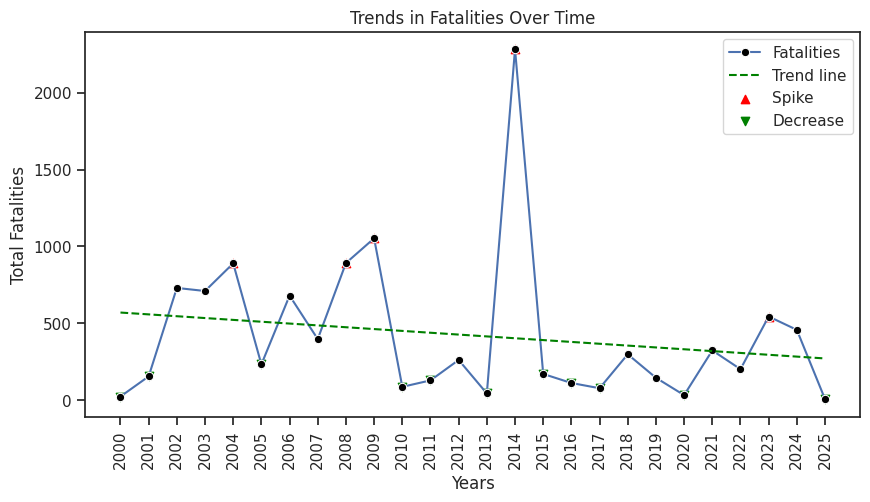

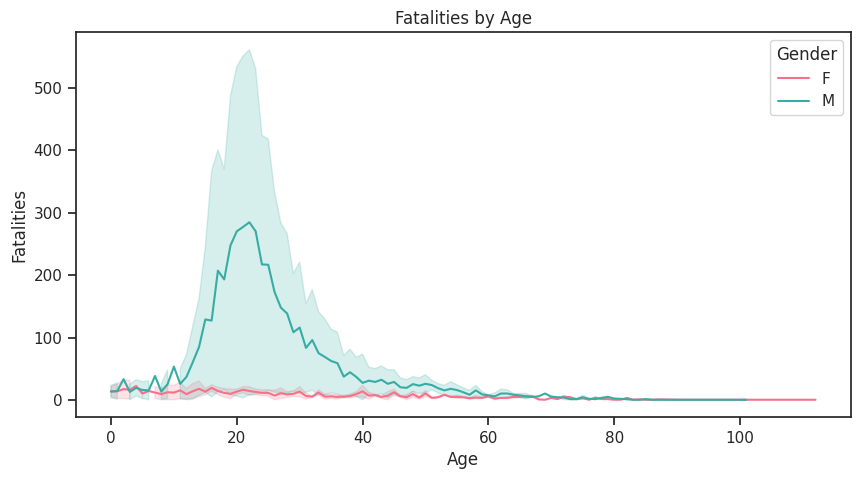

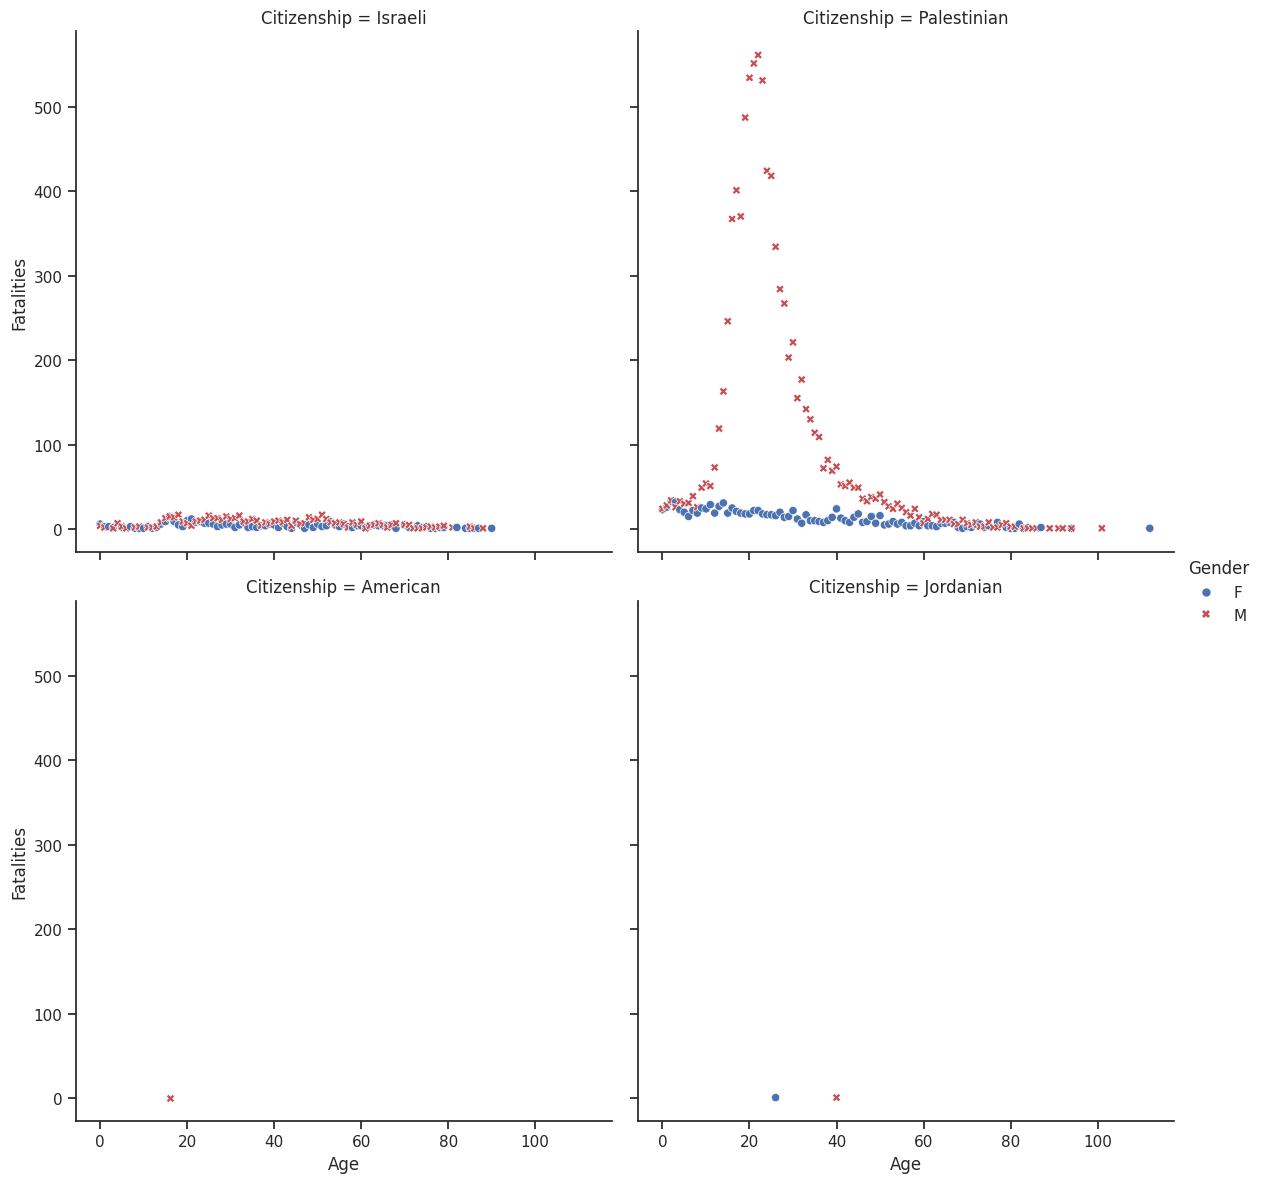

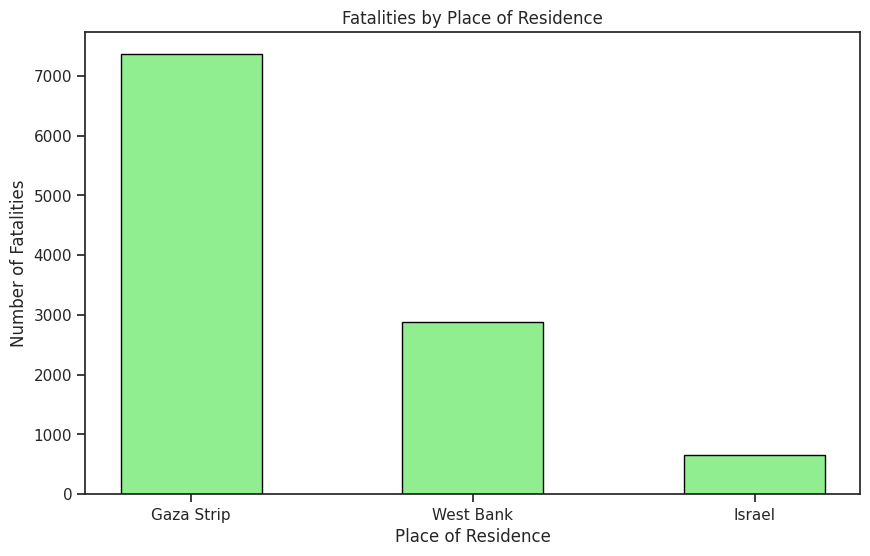

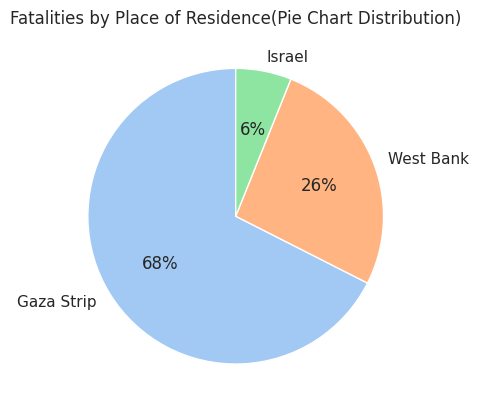

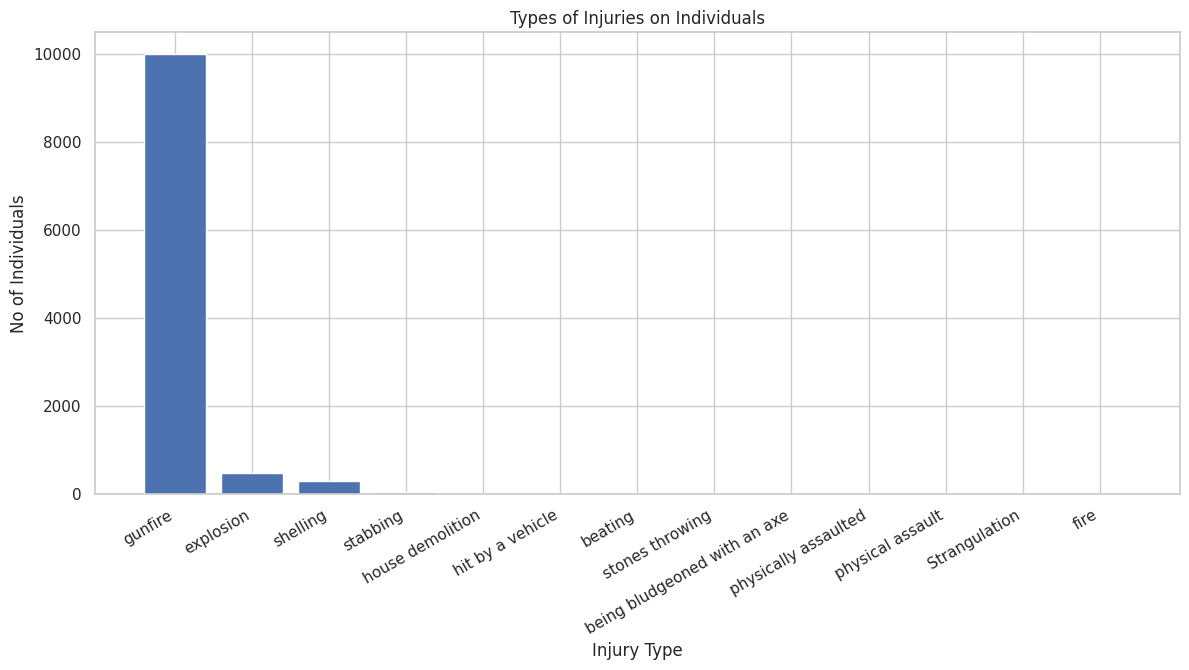

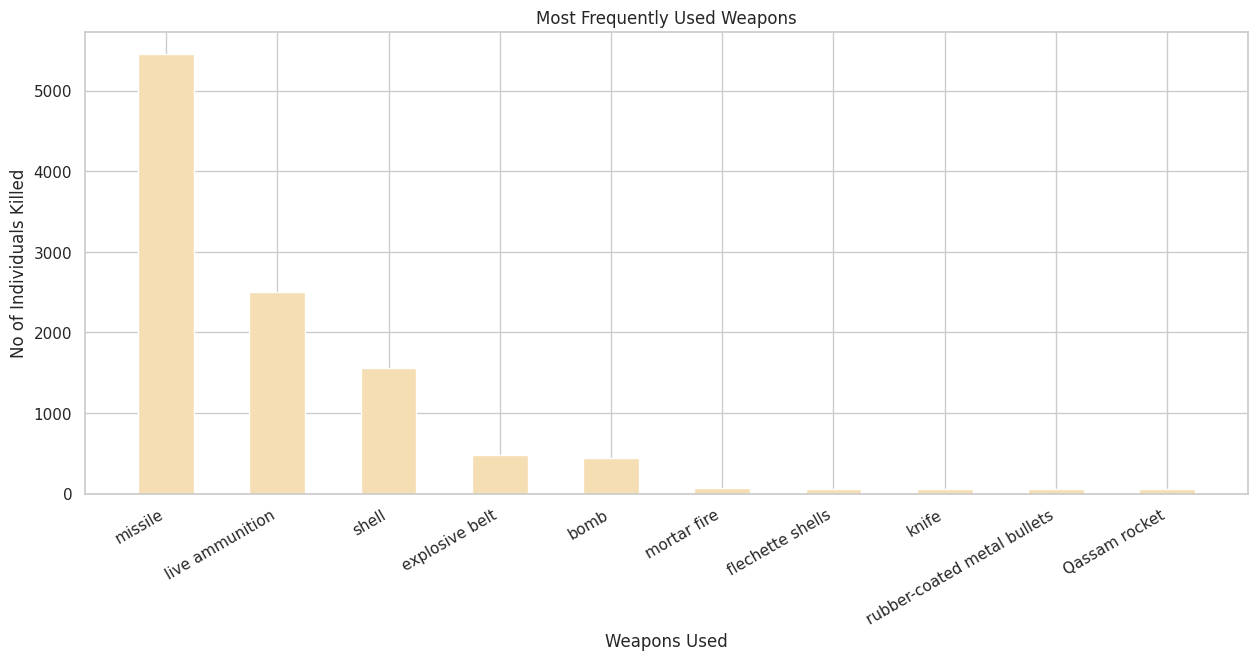

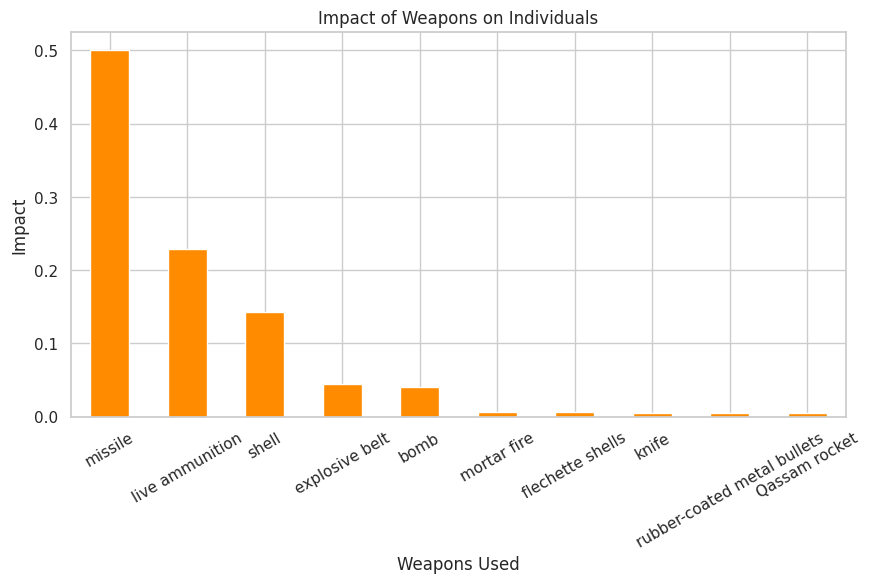

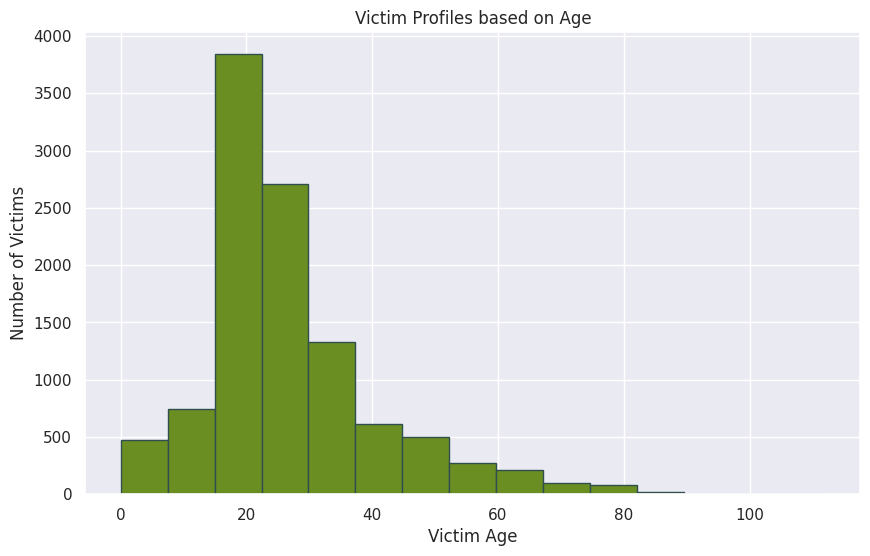

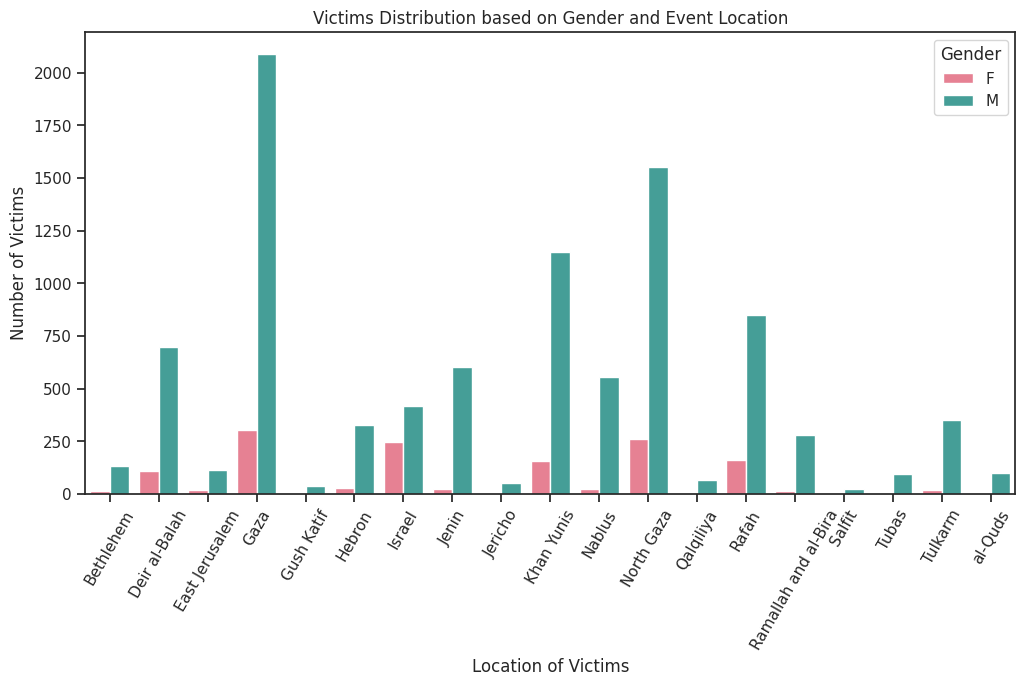

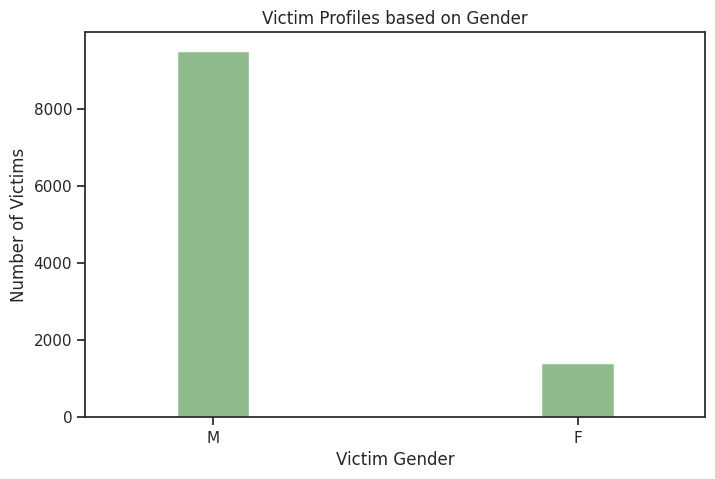

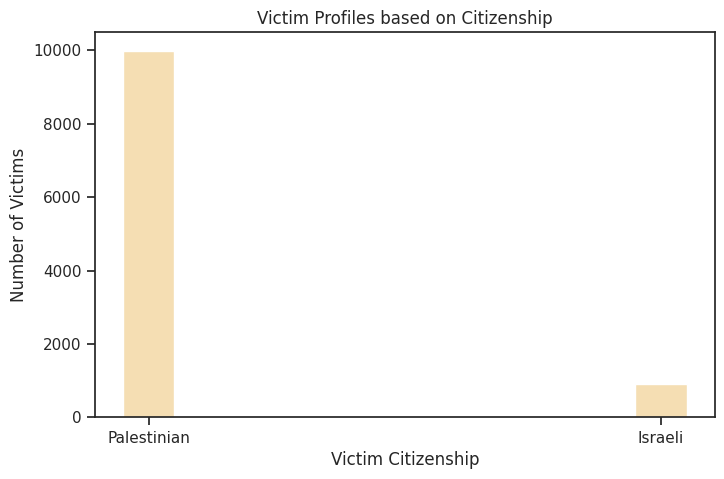

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ft = pd.read_csv("dataset.csv") #importing data

#Cleaning Data
ft["Age"].fillna(method="ffill", inplace=True)
ft["Gender"].fillna(method="ffill", inplace=True)
ft["Took part in the hostilities"].fillna("Unknown",inplace=True)
ft["Place of residence"].fillna(method="ffill", inplace=True)
ft["Place of residence - District"].fillna(method="ffill", inplace=True)
ft["Type of injury"].fillna(method="ffill", inplace=True)
ft["Ammunition"].fillna(method="ffill", inplace=True)
ft["Notes"].fillna("Unknown", inplace=True)
#print(ft.isnull().sum())
#Sorting Data
ft['Date of event'] = pd.to_datetime(ft['Date of event'])
ft = ft.sort_values(by="Date of event", ascending=False)
ft["Date of death"] = pd.to_datetime(ft["Date of death"])
ft = ft.sort_values(by="Date of death", ascending=False)


                    #TASK 1
ft['Date of event'] = pd.to_datetime(ft['Date of event'])
groupdt = ft.groupby(ft['Date of death'].dt.to_period("Y"))
data = groupdt.size().reset_index(name='fatalities')
x = np.arange(len(data))
y = data['fatalities'].values
coefficients = np.polyfit(x, y, 1)
trends = np.polyval(coefficients, x)
rsd = y - trends
thresh = 200
spikes = np.where(rsd > thresh)[0]
declines = np.where(rsd < -thresh)[0]

plt.figure(figsize=(10, 5))
sns.lineplot(x =data['Date of death'].astype(str), y =data['fatalities'], data=data, marker='o', markerfacecolor='black', label='Fatalities')
sns.lineplot(x = data['Date of death'].astype(str), y=trends, linestyle='--', color='green', label='Trend line')
plt.scatter(data['Date of death'].iloc[spikes].astype(str), data['fatalities'].iloc[spikes], marker='^', color='red', label='Spike')
plt.scatter(data['Date of death'].iloc[declines].astype(str), data['fatalities'].iloc[declines], marker='v', color='green', label='Decrease')
plt.title('Trends in Fatalities Over Time')
plt.xlabel('Years')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)
plt.legend()
plt.show()


                #TASK 2
analysis = ft[['Age', 'Gender', 'Citizenship']].describe()
Age = ft['Age'].value_counts().reset_index()
Age.columns = ['Age', 'count']
Gender = ft['Gender'].value_counts().reset_index()
Gender.columns = ['Gender', 'count']
Citizenship = ft['Citizenship'].value_counts().reset_index()
Citizenship.columns = ['Citizenship', 'count']
deaths = ft.groupby(['Age', 'Gender', 'Citizenship']).size().reset_index(name='Fatalities')
sns.set_theme(style="ticks")

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'normal'

plt.figure(figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Fatalities')
plt.title('Fatalities by Age')
sns.lineplot(data=ft, x=deaths['Age'], y=deaths['Fatalities'],hue=deaths['Gender'],palette="husl")
sns.relplot(data=ft, x=deaths['Age'], y=deaths['Fatalities'], col=deaths['Citizenship'], hue=deaths['Gender'], style=deaths['Gender'],
            col_wrap=2, palette=["b", "r"], sizes=(10, 100),height=6, aspect=1,kind="scatter",   )



                #TASK 3
violenceregions = ft['Event location - Region'].value_counts().head(10)
plt.figure(figsize=(10, 6))
#bar chart
barchart = plt.bar(violenceregions.index, violenceregions, color='lightgreen', edgecolor='black', width=0.5)
plt.title('Fatalities by Place of Residence')
plt.xlabel('Place of Residence')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=0, ha='center')
plt.show()
#pie chart
colors=sns.color_palette('pastel')[0:3]
plt.pie(violenceregions, labels=violenceregions.index, startangle=90, autopct='%.0f%%', colors=colors)
plt.title('Fatalities by Place of Residence(Pie Chart Distribution)')
plt.xticks(rotation=0, ha='center')
plt.show()


                #TASK 4
injuries = ft['Type of injury'].value_counts().head(13)
plt.figure(figsize=(14,6))
sns.set_theme(style="whitegrid")
plt.bar(injuries.index, injuries.values)
plt.title('Types of Injuries on Individuals')
plt.xlabel('Injury Type')
plt.ylabel('No of Individuals')
plt.xticks(rotation=30, ha='right')
plt.show()


                #TASK 5
weapons = ft['Ammunition'].value_counts().head(10)
plt.figure(figsize=(15,6))
plt.bar(weapons.index, weapons.values, color='wheat', width=0.5)
plt.title('Most Frequently Used Weapons')
plt.xlabel('Weapons Used')
plt.ylabel('No of Individuals Killed')
plt.xticks(rotation=30, ha='right')
plt.show()
#calculate impact
weaponsimpact = weapons/len(ft)
plt.figure(figsize=(10,5))
weaponsimpact.plot(kind='bar', color='darkorange')
plt.title('Impact of Weapons on Individuals')
plt.xlabel('Weapons Used')
plt.ylabel('Impact')
plt.xticks(rotation=30, ha='center')
plt.show()



            #TASK 6
#Age distribution
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
plt.hist(ft['Age'].dropna(), bins=15, color= 'olivedrab', edgecolor='darkslategray')
plt.title('Victim Profiles based on Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0, ha='center')
plt.show()
#profiles based on Age, Gender and event location
victimprofiles = ft.groupby(['Event location - District', 'Gender']).size().reset_index(name='victims')
plt.figure(figsize=(12,6))
sns.set_theme(style='ticks')
sns.barplot(x='Event location - District', y='victims', hue=victimprofiles['Gender'], data=victimprofiles, palette='husl')
plt.title('Victims Distribution based on Gender and Event Location')
plt.xlabel('Location of Victims')
plt.ylabel('Number of Victims')
plt.xticks(rotation=60, ha='center')
plt.show()
#Gender distribution
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
Genderdistt = ft['Gender'].value_counts()
Genderdistt.plot(kind='bar', color='darkseagreen', width=0.2)
plt.title('Victim Profiles based on Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0, ha='center')
plt.show()
#Citizenship Distribution
sns.set_theme(style='ticks')
plt.figure(figsize=(8,5))
citizendistt = ft['Citizenship'].value_counts().head(2)
plt.bar(citizendistt.index, citizendistt.values, color='wheat', width=0.1)
plt.title('Victim Profiles based on Citizenship')
plt.xlabel('Victim Citizenship')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0, ha='center')
plt.show()

